<a href="https://www.kaggle.com/code/eugenetanake/basic-web-scraping-s-pt-4-extra-practice?scriptVersionId=97454185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/basic-web-scraping-with-python-pt-3/webScrap3.csv
/kaggle/input/basic-web-scraping-with-python-pt-3/__results__.html
/kaggle/input/basic-web-scraping-with-python-pt-3/__resultx__.html
/kaggle/input/basic-web-scraping-with-python-pt-3/__notebook__.ipynb
/kaggle/input/basic-web-scraping-with-python-pt-3/__output__.json
/kaggle/input/basic-web-scraping-with-python-pt-3/custom.css


In [2]:
df = pd.read_csv('/kaggle/input/basic-web-scraping-with-python-pt-3/webScrap3.csv')
df

,course name,url,duration,by,viewer count,release date,likes,skill level,rating,rating max
0,Career Wellness Nano Tips with Shadé Zahrai,https://www.linkedin.com/learning/career-welln...,3,By: Shadé Zahrai,181477,169,27606,2.0,4.7,out of 5
1,Job Interview Nano Tips with Madeline Mann,https://www.linkedin.com/learning/job-intervie...,3,By: Madeline Mann,537464,169,12301,2.0,4.5,out of 5
2,Be the Manager People Won't Leave,https://www.linkedin.com/learning/be-the-manag...,28,By: Laurie Ruettimann,1071484,258,83945,2.5,4.7,out of 5
3,Revit: AR and VR Workflows,https://www.linkedin.com/learning/revit-ar-and...,120,By: Logan Smith,243740,1294,16260,3.0,4.8,out of 5
4,Expert Tips for Answering Common Interview Que...,https://www.linkedin.com/learning/expert-tips-...,74,"By: Jenny Foss, LinkedIn Learning Instructors,...",1641135,1179,10675,2.0,4.8,out of 5
5,Excel: VLOOKUP and XLOOKUP for Beginners,https://www.linkedin.com/learning/excel-vlooku...,19,By: Jess Stratton,785513,304,80803,2.0,4.7,out of 5
6,Excel Essential Training (Office 365/Microsoft...,https://www.linkedin.com/learning/excel-essent...,137,By: Dennis Taylor,1484225,1347,72033,2.5,4.8,out of 5
7,Dan Ariely on Making Decisions,https://www.linkedin.com/learning/dan-ariely-o...,57,By: Dan Ariely,400407,135,10516,1.0,4.7,out of 5
8,Animating in Historical Styles,https://www.linkedin.com/learning/animating-in...,159,By: Dermot O' Connor,339773,350,5281,2.0,4.8,out of 5
9,SOLIDWORKS: Modeling a Bicycle,https://www.linkedin.com/learning/solidworks-m...,123,By: Johno Ellison,102501,395,14166,2.0,4.7,out of 5


Logically speaking, the only independent variables in this table are Title, duration, release date.

If there are no foul play, the number of likes should not exceed the viewer count. Though we can always double check on that.

The case is slightly similar for rating. For the rating to exist, there has to be viewers, the rating then encourage more viewers. There are also chances of rating bias.

In [3]:
weirdLikesCount = 0
for i in range(len(df)):
    if df['likes'][i] > df['viewer count'][i]:
        weirdLikesCount +=1
weirdLikesCount

0

As expected, there should not be any like count higher than viewer count.

Let us take a look at the distribution of the values.

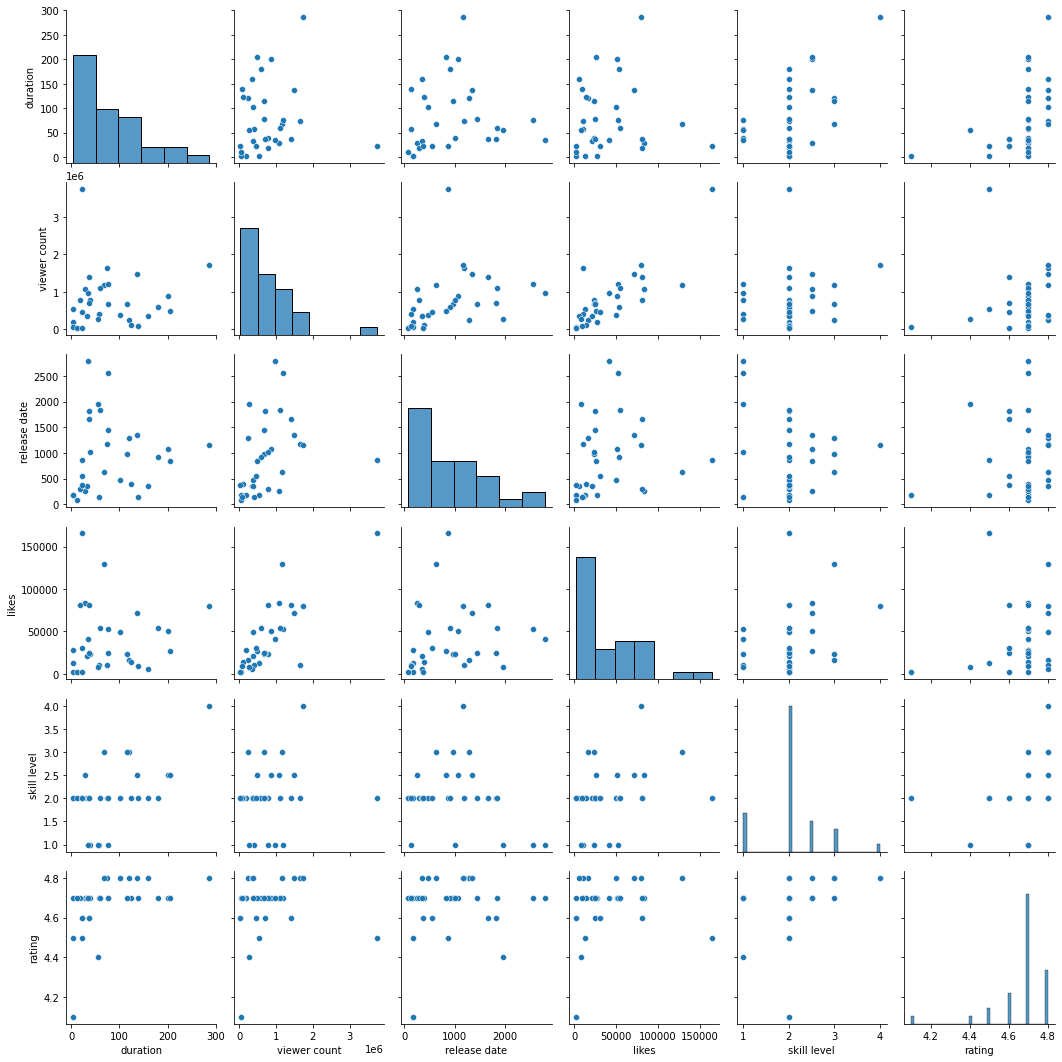

In [4]:
sns.pairplot(df)

Anything beyond this point is merely practice. There are too many issues with this dataset. There are extreme outliers as I am only able to extract 50 courses for non-playing accounts. The dataset is not going to be accurate due to lacking important features such as the weight of the instructor and the weight of the course name. 

Let us take a look at the correlations.

In [5]:
dataf = df[['viewer count','duration','release date','likes','skill level','rating']]
dataf.head()

,viewer count,duration,release date,likes,skill level,rating
0,181477,3,169,27606,2.0,4.7
1,537464,3,169,12301,2.0,4.5
2,1071484,28,258,83945,2.5,4.7
3,243740,120,1294,16260,3.0,4.8
4,1641135,74,1179,10675,2.0,4.8


In [6]:
dfcorr = dataf.corr()
dfcorr

,viewer count,duration,release date,likes,skill level,rating
viewer count,1.000000,0.057629,0.333952,0.809398,0.161920,0.074884
duration,0.057629,1.000000,0.106384,0.049543,0.530754,0.457429
release date,0.333952,0.106384,1.000000,0.155643,-0.228460,0.070198
likes,0.809398,0.049543,0.155643,1.000000,0.299407,0.142847
skill level,0.161920,0.530754,-0.228460,0.299407,1.000000,0.290222
rating,0.074884,0.457429,0.070198,0.142847,0.290222,1.000000


<AxesSubplot:>

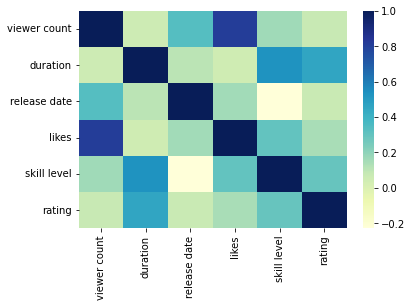

In [7]:
sns.heatmap(dfcorr,xticklabels=dfcorr.columns,yticklabels=dfcorr.columns,cmap="YlGnBu")

As expected, there is a high correlation between likes and viewer count. Let us take a look at the variation inflation factor to detect if there are Multicollinearity.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataf.values, i)
                          for i in range(len(dataf.columns))]

In [9]:
vif_data

,feature,VIF
0,viewer count,7.184955
1,duration,3.598981
2,release date,3.662861
3,likes,7.032124
4,skill level,21.624129
5,rating,18.671879


The information I looked up was that generally a value of 5 and above indicates high multicollinearity. The values I see above is out of my expectation. Let me try again without "likes".

In [10]:
dataf = dataf[['viewer count','duration','release date','skill level','rating']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataf.values, i)
                          for i in range(len(dataf.columns))]
vif_data

,feature,VIF
0,viewer count,2.665770
1,duration,3.525742
2,release date,3.634777
3,skill level,20.053068
4,rating,18.444184


Skill level and rating's score is still way too high.

In [11]:
dataf = dataf[['viewer count','duration','release date','skill level']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataf.values, i)
                          for i in range(len(dataf.columns))]
vif_data

,feature,VIF
0,viewer count,2.633711
1,duration,3.249020
2,release date,2.512392
3,skill level,4.649672


This was almost in line with what I had in mind when I started out this project. I wanted to see how the other features and factors affect the viewer count. Although it is not going to be accurate due to lacking important features such as the instructor and the course name. Let me practice using machine learning.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
dX = dataf[['duration','release date','skill level']]
X = dX.values
dy = dataf[['viewer count']]
y = dy.values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

573877.1059431703
0.05608811831562133


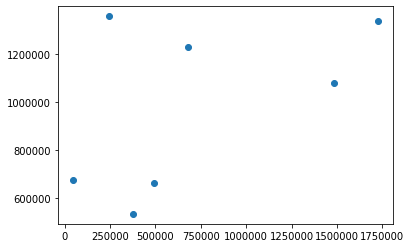

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.ticklabel_format(style='plain')

As expected. A high score on mean squared error indicates extreme outliers while a r2score of <0.25 means that the independent variables does not explain much about the variation of the dependent variable.

Thank you for viewing all the way down to this last cell! Not all datasets are going to be perfect for applying machine learning but all the experience will help me slowly learn and grow as I go down this path. 